Previous results stalled at ~1K epochs. Next set of improvements:
1. More training data ✔
2. Better submodel architecture
3. Add cross-validation and reporting to training loop
4. Convert each submodel to an ensemble

In [1]:
# from snap import get_images, purge_opaque
# get_images('pokedex.txt', '.data/') # pulls 17K images but takes ~11m
# purge_opaque('.data/') # broken transparency trains the model to paint solid squares

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060, compute capability 8.6
Found 3072 files belonging to 1 classes.


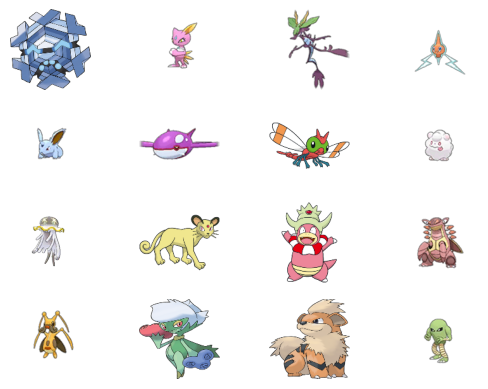

In [2]:
import dcgan_v4 as v4
dataset = v4.load_dataset('.data/')
next(v4.get_sample(dataset))
pass

In [3]:
# generator, discriminator = v4.make_generator(), v4.make_discriminator()
# v4.train(generator, discriminator, dataset, epochs=10)
# pass # failed: model kept guessing constant values

In [4]:
# import dcgan_v5 as v5
# v5.train(v5.make_generator(), v5.make_discriminator(), dataset, 200)
# pass # failed: model stopped updating after ~80 epochs